In [1]:
import networkx as nx
import numpy as np 
import random
import math 
from numpy.linalg import matrix_rank
from scipy import linalg

def get_adj(g):
  adj = np.zeros((len(g.nodes()),len(g.nodes())))
  #print(g.edges())
  for e in np.array(g.edges()):
    adj[e[0],e[1]] = 1
    adj[e[1],e[0]] = 1
  return adj


def getCycles(A,max_len=math.inf):
  ''''A = adj matrix'''
  ''''p_max_len = lenght if max cycles wanted, inf default for all cycles'''
  G = nx.DiGraph(A)
  cycles = nx.simple_cycles(G)
  final = []
  for elem in cycles:
    if sorted(elem) not in [sorted(x) for x in final]:
      final.append(elem)
  final = [c for c in final if len(c)>=3 and len(c)<= max_len]
  final.sort(key=len)
  return final


def create_B1(A):
  G = nx.Graph(A) #nx.from_numpy_matrix(A) #
  E_list = list(G.edges) 
  B1 = np.zeros([len(G.nodes),len(E_list)])
  for n in G.nodes: 
    for e in E_list:
      if n==e[0]:
        B1[n,E_list.index(e)] = 1
      elif n==e[1]:
        B1[n,E_list.index(e)] = -1 
      else:
        B1[n,E_list.index(e)] = 0
  return B1

def create_B2(A,p_max_len=math.inf):
  ''''A = adj matrix'''
  ''''p_max_len = lenght if max cycles wanted, inf default for all cycles'''
  G = nx.Graph(A) # nx.from_numpy_matrix(A) #
  E_list = list(G.edges)
  All_P = getCycles(A,p_max_len)
  cycles = [x + [x[0]] for x in All_P]
  P_list = []
  for c in cycles:
    p = []
    for i in range(len(c)-1):
      p.append([c[i],c[i+1]])
    P_list.append(p)
  B2 = np.zeros([len(E_list),len(P_list)])
  for e in E_list:
    for p in P_list:
      if list(e) in p:
        B2[E_list.index(e),P_list.index(p)] = 1
      elif [e[1],e[0]] in p:
        B2[E_list.index(e),P_list.index(p)] = -1
      else:
        B2[E_list.index(e),P_list.index(p)] = 0
  qr = linalg.qr(B2,pivoting=True)
  B2 = B2[: ,sorted(qr[2])[:matrix_rank(B2)]]
  return B2


KeyboardInterrupt: 

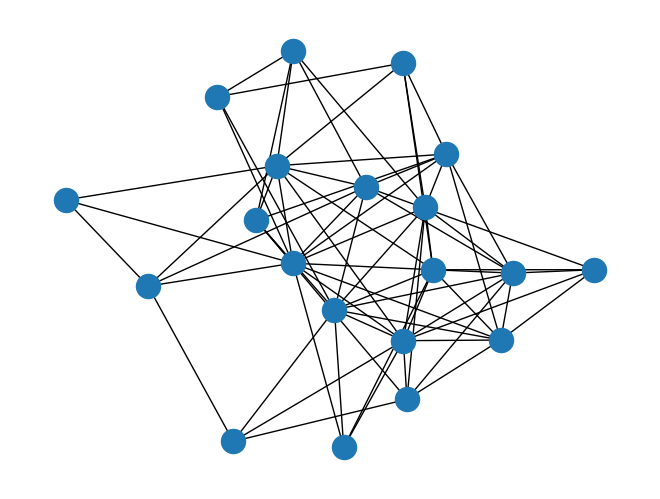

In [5]:
n = 20
p = .4
seed = 0
G = nx.erdos_renyi_graph(n, p, seed)
nx.draw(G)
A = get_adj(G)
B1 = create_B1(A)
B2 = create_B2(A,4)
